In [20]:
import time
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from constants import *

from sklearn import datasets
from sklearn.mixture import GaussianMixture as GMM
from sklearn.model_selection import StratifiedKFold
from sklearn.cluster import KMeans,AffinityPropagation

import warnings
from constants import *
import math
import seaborn as sns
import random
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
import dill

In [2]:
df = pd.read_csv('/Users/akankshitadash/Desktop/GMM/TE.txt',sep='\t')

In [21]:
df.head()

,AccNum,GeneName,TE0,TE1,TE2,TE3,TE4,foldTE1,foldTE2,foldTE3,foldTE4
0,NM_017847,ODR4,1.311593,1.239842,1.411084,1.623031,1.266305,-0.071751,0.099491,0.311438,-0.045287
1,NM_001003803,ATP5S,1.898159,1.914442,2.395429,2.596103,1.894337,0.016283,0.497270,0.697943,-0.003823
2,NM_016647,THEM6,0.051293,0.207781,0.361159,0.620028,0.068366,0.156488,0.309866,0.568735,0.017073
3,NM_016640,MRPS30,0.556363,0.551786,0.263127,0.284844,0.340352,-0.004577,-0.293236,-0.271519,-0.216011
4,NM_001080825,TMEM120B,0.237953,0.493599,0.790843,0.390857,0.455389,0.255646,0.552890,0.152904,0.217436


In [4]:
df.keys()

Index(['AccNum', 'GeneName', 'TE0', 'TE1', 'TE2', 'TE3', 'TE4', 'foldTE1',
       'foldTE2', 'foldTE3', 'foldTE4'],
      dtype='object')

In [25]:
path =  '/Users/akankshitadash/Desktop/HMM/'
clusters = [[],[]]
indices = [[],[]]
num = ['4','5']
for i in num: #cluster number 4,5,6
    for j in range(int(i)): #sub-cluster within clusters
        path_load=path+i+'/Gene'+str(j+1)+'.txt'
        print(path_load)
        f = open(path_load, "r")
        idx=0
        for x in f:
            if(not df.loc[df['GeneName'] == x[:-1]].empty):
                idx+=1
                list_new = df.loc[df['GeneName'] == x[:-1]][['foldTE1','foldTE2', 'foldTE3', 'foldTE4']].values[0]
                clusters[int(i)-4].append(list_new)
        indices[int(i)-4].append(len(clusters[int(i)-4]))
        print(len(clusters[int(i)-4]),idx)     
        
        

/Users/akankshitadash/Desktop/HMM/4/Gene1.txt
1529 1529
/Users/akankshitadash/Desktop/HMM/4/Gene2.txt
2516 987
/Users/akankshitadash/Desktop/HMM/4/Gene3.txt
4098 1582
/Users/akankshitadash/Desktop/HMM/4/Gene4.txt
5576 1478
/Users/akankshitadash/Desktop/HMM/5/Gene1.txt
803 803
/Users/akankshitadash/Desktop/HMM/5/Gene2.txt
1831 1028
/Users/akankshitadash/Desktop/HMM/5/Gene3.txt
3225 1394
/Users/akankshitadash/Desktop/HMM/5/Gene4.txt
4440 1215
/Users/akankshitadash/Desktop/HMM/5/Gene5.txt
5576 1136


In [18]:
print(indices)

[[1412, 5576]]


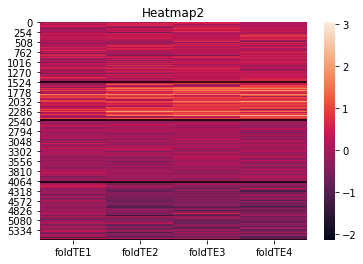

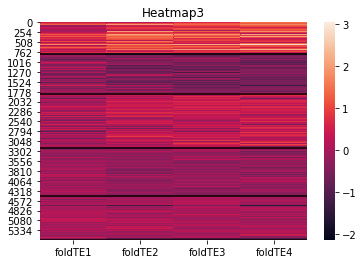

In [26]:
def plot_heatmap(X,idx,indices,path):
    ax = sns.heatmap(X,xticklabels=['foldTE1',
       'foldTE2', 'foldTE3', 'foldTE4'])
    plt.title('Heatmap'+str(idx))
    ax.hlines(indices, *ax.get_xlim())
    plt.savefig(path)
    plt.show()
    
for idx,cluster in enumerate(clusters):
    path = '/Users/akankshitadash/Desktop/HMM/4/'+str(idx+2)
    plot_heatmap(cluster,idx+2,indices[idx],path)

In [ ]:
gmm = GMM(n_components=2, covariance_type='full',n_init=15)
gmm.fit(X)
K = 2 #insert K here
X_predicted = [ [] for i in range(K)]


for idx,cluster in enumerate(X_predicted):
    fig = plt.subplot(111)
    for points in cluster:
        fig.plot(var_plot_list,points)
    title = "GMM for "+str(len(cluster)) + " points"
    plt.title(title)
    plt.savefig('/Users/akankshitadash/Desktop/HMM/4/Cluster'+str(idx+1))
    plt.show() 